Total number of images in the dataset: 3738


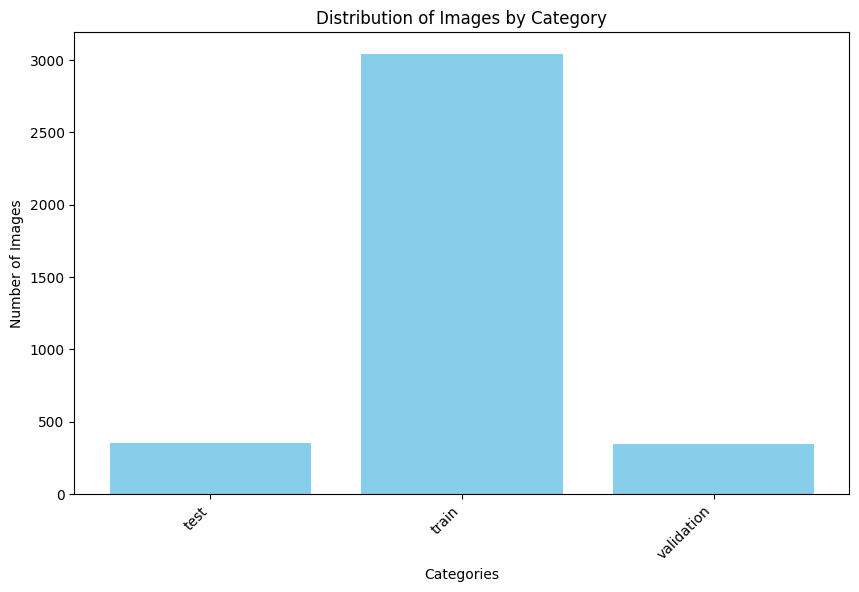

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Path to your dataset folder
dataset_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive'

# Function to count images in a folder
def count_images(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
                count += 1
    return count

# Count the total number of images
total_images = count_images(dataset_folder)

# Print the total number of images
print(f'Total number of images in the dataset: {total_images}')

# Visualize the distribution of images by category (if applicable)
if os.path.isdir(dataset_folder):
    categories = os.listdir(dataset_folder)
    image_counts = [count_images(os.path.join(dataset_folder, category)) for category in categories]

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(categories, image_counts, color='skyblue')
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images by Category')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [17]:
# Function to get image resolutions and their counts
dataset_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive'
def get_resolution_counts(folder_path):
    resolution_counts = {}

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Add more extensions if needed
                image_path = os.path.join(root, file)

                # Open the image using PIL
                with Image.open(image_path) as img:
                    width, height = img.size
                    resolution = (width, height)

                    # Count the resolution occurrences
                    resolution_counts[resolution] = resolution_counts.get(resolution, 0) + 1

    return resolution_counts

# Get image resolutions and their counts
resolution_counts = get_resolution_counts(dataset_folder)

# Find the resolution with the highest count
most_common_resolution = max(resolution_counts, key=resolution_counts.get)

# Print the results
print(f'Total number of unique resolutions: {len(resolution_counts)}\n')

print('Top 5 Resolutions and Counts:')
for resolution, count in sorted(resolution_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f'Resolution: {resolution} - Count: {count}')

print(f'\nResolution with the Highest Count: {most_common_resolution} - Count: {resolution_counts[most_common_resolution]}')

Total number of unique resolutions: 1667

Top 5 Resolutions and Counts:
Resolution: (1000, 1000) - Count: 115
Resolution: (1200, 800) - Count: 66
Resolution: (800, 800) - Count: 58
Resolution: (1280, 720) - Count: 52
Resolution: (600, 600) - Count: 50

Resolution with the Highest Count: (1000, 1000) - Count: 115


In [13]:
# Function to analyze class distribution
def analyze_class_distribution(folder_path):
    class_counts = {}

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        # Check if the item is a directory
        if os.path.isdir(category_path):
            # Count the number of images in each category
            class_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))])

    return class_counts

# Get class distribution
class_distribution = analyze_class_distribution(dataset_folder)

# Print the results
print('Class Distribution:')
for category, count in class_distribution.items():
    print(f'{category}: {count} images')

Class Distribution:
test: 0 images
train: 0 images
validation: 0 images


In [23]:
# Function to automatically categorize folders into fruits and vegetables and count images
dataset_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive/train'
def categorize_and_count_images(folder_path):
    fruit_keywords = ['apple', 'apricot', 'avocado', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut', 'date', 'dragonfruit', 'fig', 'grape', 'kiwi', 'lemon', 'lime', 'mango', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'raspberry', 'strawberry', 'watermelon']
    vegetable_keywords = ['artichoke', 'asparagus', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'greenbean', 'kale', 'lettuce', 'onion', 'pepper', 'potato', 'pumpkin', 'radish', 'spinach', 'squash', 'sweetpotato', 'tomato', 'zucchini']

    total_count = 0
    fruit_count = 0
    vegetable_count = 0

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        # Check if the item is a directory
        if os.path.isdir(category_path):
            # Count the number of images in each category
            image_count = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
            total_count += image_count

            # Check if the folder name contains keywords for fruits or vegetables
            category_lower = category.lower()
            if any(keyword in category_lower for keyword in fruit_keywords):
                fruit_count += image_count
            elif any(keyword in category_lower for keyword in vegetable_keywords):
                vegetable_count += image_count

    return total_count, fruit_count, vegetable_count

# Get counts
total_count, fruit_count, vegetable_count = categorize_and_count_images(dataset_folder)

# Print the results
print(f'Total number of images: {total_count}')
print(f'Number of Fruits Images: {fruit_count}')
print(f'Number of Vegetables Images: {vegetable_count}')

Total number of images: 3040
Number of Fruits Images: 903
Number of Vegetables Images: 1365


In [24]:
# Function to automatically categorize folders into fruits and vegetables and count images
dataset_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive/test'
def categorize_and_count_images(folder_path):
    fruit_keywords = ['apple', 'apricot', 'avocado', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut', 'date', 'dragonfruit', 'fig', 'grape', 'kiwi', 'lemon', 'lime', 'mango', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'raspberry', 'strawberry', 'watermelon']
    vegetable_keywords = ['artichoke', 'asparagus', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'greenbean', 'kale', 'lettuce', 'onion', 'pepper', 'potato', 'pumpkin', 'radish', 'spinach', 'squash', 'sweetpotato', 'tomato', 'zucchini']

    total_count = 0
    fruit_count = 0
    vegetable_count = 0

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        # Check if the item is a directory
        if os.path.isdir(category_path):
            # Count the number of images in each category
            image_count = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
            total_count += image_count

            # Check if the folder name contains keywords for fruits or vegetables
            category_lower = category.lower()
            if any(keyword in category_lower for keyword in fruit_keywords):
                fruit_count += image_count
            elif any(keyword in category_lower for keyword in vegetable_keywords):
                vegetable_count += image_count

    return total_count, fruit_count, vegetable_count

# Get counts
total_count, fruit_count, vegetable_count = categorize_and_count_images(dataset_folder)

# Print the results
print(f'Total number of images: {total_count}')
print(f'Number of Fruits Images: {fruit_count}')
print(f'Number of Vegetables Images: {vegetable_count}')

Total number of images: 353
Number of Fruits Images: 107
Number of Vegetables Images: 157


In [25]:
# Function to automatically categorize folders into fruits and vegetables and count images
dataset_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive/validation'
def categorize_and_count_images(folder_path):
    fruit_keywords = ['apple', 'apricot', 'avocado', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut', 'date', 'dragonfruit', 'fig', 'grape', 'kiwi', 'lemon', 'lime', 'mango', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'raspberry', 'strawberry', 'watermelon']
    vegetable_keywords = ['artichoke', 'asparagus', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'greenbean', 'kale', 'lettuce', 'onion', 'pepper', 'potato', 'pumpkin', 'radish', 'spinach', 'squash', 'sweetpotato', 'tomato', 'zucchini']

    total_count = 0
    fruit_count = 0
    vegetable_count = 0

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        # Check if the item is a directory
        if os.path.isdir(category_path):
            # Count the number of images in each category
            image_count = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
            total_count += image_count

            # Check if the folder name contains keywords for fruits or vegetables
            category_lower = category.lower()
            if any(keyword in category_lower for keyword in fruit_keywords):
                fruit_count += image_count
            elif any(keyword in category_lower for keyword in vegetable_keywords):
                vegetable_count += image_count

    return total_count, fruit_count, vegetable_count

# Get counts
total_count, fruit_count, vegetable_count = categorize_and_count_images(dataset_folder)

# Print the results
print(f'Total number of images: {total_count}')
print(f'Number of Fruits Images: {fruit_count}')
print(f'Number of Vegetables Images: {vegetable_count}')

Total number of images: 345
Number of Fruits Images: 105
Number of Vegetables Images: 153
